In [43]:
import csv
import pandas as pd
import geopandas as gpd

from pathlib import Path

In [9]:
from IPython.display import display

In [24]:
def generate_source_filename(name=None, year=2017):
    if name == 'depot': 
        return 'depots_deneigement_saison_{s}-{e}.csv'.format(s=year,e=year+1)
    elif name == 'secteur': 
        return 'secteurs_deneigement_saison_{s}-{e}.csv'.format(s=year,e=year+1)    
    else:
        raise 'name should be depot, secteur, transaction, contrat'
        return None

def generate_source_path(name=None,year=2017):
    if name == 'secteur':
        return Path('data','secteur',generate_source_filename(name,year))
    else:
        return None

In [25]:
year = 2017

In [35]:
secteur = pd.read_csv(generate_source_path('secteur',2017))
print(secteur.shape)
display(secteur.head(3))
adm = gpd.read_file('data/limite_administrative/limites-administratives-agglomeration.geojson')
print(adm.shape)
display(adm.head(3))

(186, 5)


IdenfiantSecteur NomSecteur  IdentifiantArrondissement ArrondissementCode  \
0                 4     RDP-91                         17                RDP   
1                 4     RDP-91                         17                RDP   
2                 5     RDP-92                         17                RDP   

     Arrondissement  
0  R.D.P. /  P.A.T.  
1  R.D.P. /  P.A.T.  
2  R.D.P. /  P.A.T.

(34, 9)


CODEID                        NOM CODEMAMH  NUM ABREV            TYPE  \
0      34                      Anjou    REM09    9    AJ  Arrondissement   
1      33              Pointe-Claire    66097    8    PC      Ville liée   
2      18  Rosemont-La Petite-Patrie    REM24   25    RO  Arrondissement   

  COMMENT   DATEMODIF                                           geometry  
0     NaN  2022-08-24  MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...  
1     NaN  2022-08-24  MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ...  
2     NaN  2022-08-24  MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...

In [28]:
adm

CODEID                                       NOM CODEMAMH  NUM ABREV  \
0       34                                     Anjou    REM09    9    AJ   
1       33                             Pointe-Claire    66097    8    PC   
2       18                 Rosemont-La Petite-Patrie    REM24   25    RO   
3       21                                  Kirkland    66102    3    KL   
4       22                                 Westmount    66032    4    WM   
5        2                                 Hampstead    66062   10    HS   
6       16             Mercier-Hochelaga-Maisonneuve    REM22   23    MH   
7       32                                Senneville    66127   77    SV   
8       14                              Le Sud-Ouest    REM20   21    SO   
9       11  Rivière-des-Prairies-Pointe-aux-Trembles    REM33   19    RP   
10      31                   Sainte-Anne-de-Bellevue    66117   76    BV   
11      15                     Le Plateau-Mont-Royal    REM21   22    PM   
12       4                                    Verdun    REM12   12    VD   
13       3                       Dollard-Des Ormeaux    66142   11    DO   
14      29                              Montréal-Est    66007   74    ME   
15      26                               Baie-D'Urfé    66112   71    BU   
16       9                                   Lachine    REM27   17    LC   
17      20       Côte-des-Neiges-Notre-Dame-de-Grâce    REM34   27    CN   
18      19      Villeray-Saint-Michel-Parc-Extension    REM25   26    VS   
19      28                              L'Île-Dorval    66092   73    ID   
20      27                            Côte-Saint-Luc    66058   72    CL   
21      25                              Beaconsfield    66107    7    BF   
22       5                       Pierrefonds-Roxboro    REM31   13    PR   
23       8                             Montréal-Nord    REM16   16    MN   
24      12                                Mont-Royal    66072    2    MR   
25      30                            Montréal-Ouest    66047   75    MO   
26      17                     Ahuntsic-Cartierville    REM23   24    AC   
27       6                             Saint-Léonard    REM14   14    LN   
28      23                                 Outremont    REM05    5    OM   
29      13                               Ville-Marie    REM19   20    VM   
30      24             L'Île-Bizard-Sainte-Geneviève    REM32    6    IS   
31       1                                    Dorval    66087    1    DV   
32       7                             Saint-Laurent    REM15   15    LR   
33      10                                   LaSalle    REM17   18    LS   

              TYPE                                            COMMENT  \
0   Arrondissement                                                NaN   
1       Ville liée                                                NaN   
2   Arrondissement                                                NaN   
3       Ville liée                                                NaN   
4       Ville liée                                                NaN   
5       Ville liée                                                NaN   
6   Arrondissement                                                NaN   
7       Ville liée                                                NaN   
8   Arrondissement  Il est important de noter que la limite située...   
9   Arrondissement                                                NaN   
10      Ville liée                                                NaN   
11  Arrondissement                                                NaN   
12  Arrondissement                                                NaN   
13      Ville liée                                                NaN   
14      Ville liée                                                NaN   
15      Ville liée                                                NaN   
16  Arrondissement                                                NaN   
17  Arrondissement  Il est im

In [30]:
secteur[['ArrondissementCode','Arrondissement']].drop_duplicates()

ArrondissementCode                         Arrondissement
0                  RDP                       R.D.P. /  P.A.T.
19                 VMA                            Ville-Marie
24                 S-O                              Sud-Ouest
27                 PMR                     Plateau Mont-Royal
34                 AHU                Ahuntsic / Cartierville
55                 RPP               Rosemont / Petite-Patrie
74                 VSP  Villeray / St-Michel / Parc-Extension
82                 CDN  Côte-des-Neiges / Notre-Dame-de-Grâce
89                 MHM      Mercier / Hochelaga / Maisonneuve
99                 ANJ                                  Anjou
114                LAC                                Lachine
118                LAS                                LaSalle
127                MTN                          Montréal-Nord
135                OUT                              Outremont
136                PRF                  Pierrefonds / Roxboro
140                SLA                          Saint-Laurent
161                SLE                          Saint-Léonard
181                VER                                 Verdun
182                IBI        L'Île Bizard / Sainte-Geneviève
185                WES                     Ville de Westmount

In [34]:
secteur['ArrondissementCode'].drop_duplicates().values

array(['RDP', 'VMA', 'S-O', 'PMR', 'AHU', 'RPP', 'VSP', 'CDN', 'MHM',
       'ANJ', 'LAC', 'LAS', 'MTN', 'OUT', 'PRF', 'SLA', 'SLE', 'VER',
       'IBI', 'WES'], dtype=object)

In [72]:
mapping_filename = 'mapping_secteur_limite_administrative.csv'
with open(mapping_filename, 'w') as f:
     f.write("""ArrondissementCode,ABREV
RDP,RP
VMA,VM
S-O,SO
PMR,PM
AHU,AC
RPP,RO
VSP,VS
CDN,CN
MHM,MH
ANJ,AJ
LAC,LC
LAS,LS
MTN,MN
OUT,OM
PRF,PR
SLA,LR
SLE,LN
VER,VD
IBI,IS
WES,WM
"""       )

In [73]:
map_secteur_adm = pd.read_csv(mapping_filename)
print(map_secteur_adm)

   ArrondissementCode ABREV
0                 RDP    RP
1                 VMA    VM
2                 S-O    SO
3                 PMR    PM
4                 AHU    AC
5                 RPP    RO
6                 VSP    VS
7                 CDN    CN
8                 MHM    MH
9                 ANJ    AJ
10                LAC    LC
11                LAS    LS
12                MTN    MN
13                OUT    OM
14                PRF    PR
15                SLA    LR
16                SLE    LN
17                VER    VD
18                IBI    IS
19                WES    WM


In [81]:
adm_mapping = adm.merge(map_secteur_adm, on='ABREV', suffixes=(None,'_to_delete'))
print(adm_mapping.columns)

Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode'],
      dtype='object')


In [83]:
adm_secteur = adm_mapping.merge(secteur, on='ArrondissementCode', suffixes=(None,'_to_delete'), how='outer')
print(adm_secteur.shape, secteur.shape)

(186, 14) (186, 5)


Heatmap like of sectors per arrondissement

note that all the zone of the island is not part of 'Ville de Montreal'
Having 3.4, 6.2, 8.4 is weird, but we used 'quantiles'

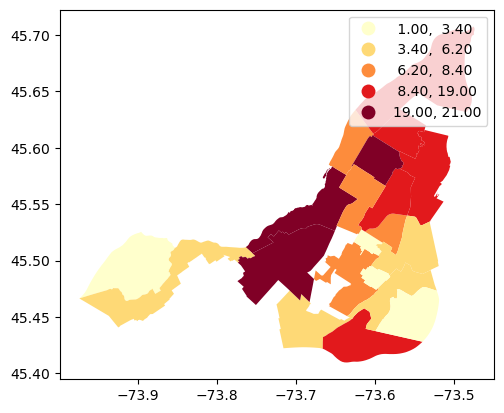

In [92]:
#

mtl_secteur = adm_secteur[['ArrondissementCode', 'geometry', 'IdenfiantSecteur']]

arrond_secteur_count = mtl_secteur.dissolve(by='ArrondissementCode', aggfunc='count')

arrond_secteur_count.plot(column = 'IdenfiantSecteur', scheme='quantiles', cmap='YlOrRd', legend=True);

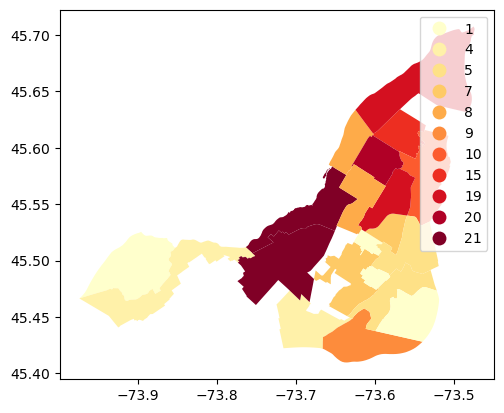

In [93]:
arrond_secteur_count.plot(column = 'IdenfiantSecteur', categorical=True, cmap='YlOrRd', legend=True);


In [85]:
adm_secteur.explore()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

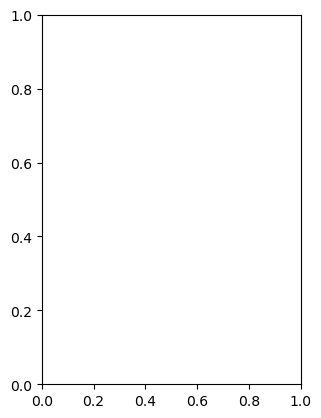

In [86]:
adm_secteur.plot(column='ArrondissementCode', cmap='OrRd', scheme='quantiles');